# Defining the black scholes function and calculating the option prices for a given stock prices and a given strike price 


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
import scipy.stats as stats 
import requests
import seaborn as sns
import os

def BSM(stock,strike,risk_free,time,volatility):
    stock_price = stock
    strike_price = strike
    risk_free_rate = risk_free
    time_to_maturity = time
    volatility = volatility
    price={}

    d1 = (np.log(stock_price/strike_price) + (risk_free_rate + volatility**2/2)*time_to_maturity)/(volatility*np.sqrt(time_to_maturity))
    d2 = d1 - volatility*np.sqrt(time_to_maturity)

    call_price = stock_price*stats.norm.cdf(d1) - strike_price*np.exp(-risk_free_rate*time_to_maturity)*stats.norm.cdf(d2)
    put_price = strike_price*np.exp(-risk_free_rate*time_to_maturity)*stats.norm.cdf(-d2) - stock_price*stats.norm.cdf(-d1)
    price['Call_Price'] = call_price
    price['Put_Price'] = put_price
    return price

## Fetching data from Pre loaded csv file for the apple stock

data=pd.read_csv('APPL_1D.csv')
data['time']=pd.to_datetime(data['time'],unit='ms')
data.set_index('time',inplace=True)

# fetching hourly data fro volatility calculation
hourly_data=data.resample('H').last()
hourly_data['log_return']=np.log(hourly_data['close']/hourly_data['close'].shift(1))
hourly_data.dropna(inplace=True)
volatility_hourly=hourly_data['log_return'].std(ddof=1)
volatility_hourly


# implementing BSM model for each hourly close price and calculating the respective call and put option prices for the given close prices 

option_values=pd.DataFrame()
strike=69
risk_free_hourly=1/32760    # assuming 5% annual treasury rate 
Time_expiry=6

hourly_data['option_prices']=hourly_data['close'].apply(BSM,args=(strike,risk_free_hourly,Time_expiry,volatility_hourly))
hourly_data['call_price']=hourly_data['option_prices'].apply(lambda x:x['Call_Price'])
hourly_data['put_price']=hourly_data['option_prices'].apply(lambda x:x['Put_Price'])

hourly_data.drop(columns=['option_prices'],inplace=True)
hourly_data.dropna(inplace=True)

option_values['Close']=hourly_data['close']
option_values['call_price']=hourly_data['call_price']
option_values['put_price']=hourly_data['put_price']


                                # creating RESULTS directory to store the plots and results
results_dir='RESULTS'
os.makedirs(results_dir,exist_ok=True)

# saving the option prices in the results folder 
csv_path=os.path.join(results_dir,'Option_Hourly_Prices.csv')
option_values.to_csv(csv_path,index=True)



                                    # plotting the above given data for visula understanding

                                    # PLOT for the hourly data and stock evolution

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

plt.figure(figsize=(10,6))
plt.plot(hourly_data.index,hourly_data['close'],label='Stock_price',linewidth=2,color='royalblue')
plt.xlabel('Hourly_Time_Interval',fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel('Hourly_close_prices',fontdict={'fontsize':14,'fontweight':'bold'})
plt.axhline(strike,color='red',linestyle='--',linewidth=1,label='STRIKE_PRICE')
plt.title('Stock Price Over Time',fontdict={'fontsize':14,'fontweight':'bold'})
plt.legend()
plot_filename=os.path.join(results_dir,'Stock_price.png')
plt.savefig(plot_filename,dpi=300)
plt.show()


                                # Plotting the Call prices vs time 

plt.figure(figsize=(10,6))
plt.plot(hourly_data.index,hourly_data['call_price'],label='Call_Price',linewidth=2,color='royalblue')
plt.xlabel('Hourly_Time_Interval',fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel(f'Call_Prices_Expirytime {Time_expiry} hours',fontdict={'fontsize':14,'fontweight':'bold'})
plt.axhline(strike,color='red',linestyle='--',linewidth=1,label='STRIKE_PRICE')
plt.title('Evolution of call prices over time',fontdict={'fontsize':14,'fontweight':'bold'})
plt.legend()
plot_filename=os.path.join(results_dir,'Call_price.png')
plt.savefig(plot_filename,dpi=300)
plt.show()



                                # plotting the put prices vs time

plt.figure(figsize=(10,6))
plt.plot(hourly_data.index,hourly_data['put_price'],label='Put_Price',linewidth=2,color='royalblue')
plt.xlabel('Hourly_Time_Interval',fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel(f'Put_Prices_Expirytime {Time_expiry} hours',fontdict={'fontsize':14,'fontweight':'bold'})
plt.axhline(strike,color='red',linestyle='--',linewidth=1,label='STRIKE_PRICE')
plt.title('Evolution of Put prices over time',fontdict={'fontsize':14,'fontweight':'bold'})
plt.legend()
plot_filename=os.path.join(results_dir,'Put_price.png')
plt.savefig(plot_filename,dpi=300)
plt.show()


                                # plotting the Option prices vs the stock price
                                # Plotting the call price vs the close price

plt.figure(figsize=(10,6))
plt.plot(hourly_data['close'],hourly_data['call_price'],label='Call_Price',linewidth=2,color='royalblue')
plt.xlabel('Close_Price',fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel('Call_Price',fontdict={'fontsize':14,'fontweight':'bold'})
plt.axhline(strike,color='red',linestyle='--',linewidth=1,label='STRIKE_PRICE')
plt.title('Evolution of Call prices with stock prices',fontdict={'fontsize':14,'fontweight':'bold'})
plt.legend()
plot_filename=os.path.join(results_dir,'Call_Stock.png')
plt.savefig(plot_filename,dpi=300)
plt.show()

                                # Plotting the Put price vs the close price

plt.figure(figsize=(10,6))
plt.plot(hourly_data['close'],hourly_data['put_price'],label='Put_Price',linewidth=2,color='royalblue')
plt.xlabel('Close_Price',fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel('Put_Price',fontdict={'fontsize':14,'fontweight':'bold'})
plt.axhline(strike,color='red',linestyle='--',linewidth=1,label='STRIKE_PRICE')
plt.title('Evolution of Put prices with stock prices',fontdict={'fontsize':14,'fontweight':'bold'})
plt.legend()
plot_filename=os.path.join(results_dir,'Put_Stock.png')
plt.savefig(plot_filename,dpi=300)
plt.show()







# SIMULATING MONTE CARLO PATHS AND CALULATING OPTION PRICES USNG MONTE CARLO SIMULATION

In [ ]:
def path_genearion(stock,risk_free_rate,volatility,duration,Noofpaths,Noofsteps):
    z=np.random.standard_normal((Noofpaths,Noofsteps))
    s=np.zeros((Noofpaths,Noofsteps+1))
    w=np.zeros((Noofpaths,Noofsteps+1))
    x=np.zeros((Noofpaths,Noofsteps+1))
    time=np.zeros(Noofsteps+1)
    result={}
    dt=duration/Noofsteps
    s[:,0]=stock
    w[:,0]=0
    x[:,0]=np.log(stock)
    time[0]=0
    for i in range(0,Noofsteps):
        if Noofpaths>=2:
            z[:,i]=(z[:,i]-np.mean(z[:,i]))/np.std(z[:,i])
            w[:,i+1]=w[:,i]+np.sqrt(dt)*z[:,i]
            s[:,i+1]=s[:,i]+risk_free_rate*dt*s[:,i] +volatility*s[:,i]*(w[:,i+1]-w[:,i])     
            x[:,i+1]=x[:,i]+(risk_free_rate-np.power(volatility,2)*0.5)*dt +volatility*(w[:,i+1]-w[:,i])
            time[i+1]=time[i]+dt
    result['Stock_price']=s
    result['Time']=time
    result['Log_stock']=x
    result['NORMALS']=z[:,-1]
    result['Brownian_normals']=w[:,-1]
    return result

def monte_carlo_option_pricing(type,strike,stock,risk_free_rate,volatility,duration,Noofpaths,Noofsteps):
    types=['call','put']
    type=type.lower()
    prices={}
    paths=path_genearion(stock,risk_free_rate,volatility,duration,Noofpaths,Noofsteps)
    stock_vals=paths['Stock_price']
    prices['call']=np.mean(np.maximum(stock_vals[:,-1]-strike,0))
    prices['put']=np.mean(np.maximum(strike-stock_vals[:,-1],0))
    if type in types:
        return prices[type]
    else:
        return print('wrong type found type values are call/put')
            
                                        # comparative analysis of pricng by black scholes model and monte carlo simulation
                                        
S_0=100                         # Initial stock value 
k=80                            # Strike price of 80 chosen for valuation
r=0.05                          # risk free rate as per us treasury bill 
volatility=0.2                  # volalitylty paramter for a 20% volalitle stock
duration=1                      # 1 year option duractio taken for comparison
Noofpaths=(np.linspace(100,10000,20))  # list of paths taken to check for eror and convergence
Noofsteps=1000                  # NUmber of time stpes take as for standard consideration 
Price_BSM={}                    
                                # Empty dictrionary initialised for the prices 
Price_BSM={}                    
                                # Empty dictrionary initialised for the prices 
Price_monte_carlo={} 
type=['Call','Put']
                                # Genetaring results and storing them in the pricing results dataframe 

for type in type:
    Price_BSM[type]={}
    Price_monte_carlo[type]={}
    for N in Noofpaths:
        Price_BSM[type][f'{int(N)}_Number_ofpaths']=BSM(S_0,k,r,duration,volatility)[f'{type}_Price']
        Price_monte_carlo[type][f'{int(N)}_Number_ofpaths']=monte_carlo_option_pricing(type,k,S_0,r,volatility,duration,int(N),Noofsteps)
        


merge={'BLACK_SCHOLES_PRICING':pd.DataFrame(Price_BSM),'MONTE_CARLO_SIMULATION_PRICING':pd.DataFrame(Price_monte_carlo)}

PRICING_RESULTS=pd.concat(merge,axis=1)

file_path=os.path.join(results_dir, 'PRICING_RESULTS.csv')
PRICING_RESULTS.to_csv(file_path)


                                # Generating kurtosis and skewness results for the abive path values and store in the KURT/SKEW data frame



                                # Initializing the dictionaries for kurtosis and skewness
kurtosis = {}                     
skewness = {}

for N in Noofpaths:
    log_stock = path_genearion(S_0, r, volatility, duration, int(N), Noofsteps)['Log_stock'][:,-1]
    kurtosis[f'{int(N)}_Number_ofpaths'] = stats.kurtosis(log_stock)
    skewness[f'{int(N)}_Number_ofpaths'] = stats.skew(log_stock)

# Convert the dictionaries to DataFrames
kurtosis_df = pd.DataFrame(list(kurtosis.items()), columns=['Number_of_Paths', 'Kurtosis'])
skewness_df = pd.DataFrame(list(skewness.items()), columns=['Number_of_Paths', 'Skewness'])

# Clean the 'Number_of_Paths' column to match the format
kurtosis_df['Number_of_Paths'] = kurtosis_df['Number_of_Paths'].str.replace('_Number_ofpaths', '').astype(int)
skewness_df['Number_of_Paths'] = skewness_df['Number_of_Paths'].str.replace('_Number_ofpaths', '').astype(int)

# Merge the DataFrames on 'Number_of_Paths'
KURTO_SKEW_DF = pd.merge(kurtosis_df, skewness_df, on='Number_of_Paths')
file_path=os.path.join(results_dir, 'KURTOSIS_SKEWNESS_RESULTS.csv')
KURTO_SKEW_DF.to_csv(file_path)



                              
   

# PLots for the monte carlo simulations 

In [ ]:
                                                # plotting the simulated monte carlo paths for the given stock price parameters



S_0=100                         # Initial stock value 
k=80                            # Strike price of 80 chosen for valuation
r=0.05                          # risk free rate as per us treasury bill 
volatility=0.5                 # volalitylty paramter for a 20% volalitle stock
duration=1                      # 1 year option duractio taken for comparison
Noofsteps=1000                  # Nof of tume steps chosen between year 0 and yerar 1 
Noofpaths=10000                 # No of paths for a better estimate and converge    
paths=path_genearion(S_0,r,volatility,duration,Noofpaths,Noofsteps)


                                # Plotting the 1oo stock paths as a fucntion of time steps 


plt.figure(figsize=(10,6))
for i in range(100):
    plt.plot(paths['Time'],paths['Stock_price'][i,:],color='royalblue',alpha=0.5,label='simulated stock prices')
    plt.title('MONTE CARLO SIMULATED STOCK PRICES',fontdict={'fontweight':'bold','fontsize':10})
    plt.xlabel('Time steps in years',fontdict={'fontweight':'bold','fontsize':10})
    plt.ylabel('Evolution of stock prices',fontdict={'fontweight':'bold','fontsize':10})
    plt.xticks(rotation=45)
    fig_path = os.path.join(results_dir,'Stock_price_montecarlo_simulation.png')
plt.savefig(fig_path,dpi=300,bbox_inches='tight')
plt.close()
                            
    
    
    


                     # plotting the distribution of stock price at time of maturity with 10000 simulation and estimating the dirstribtuion type



plt.figure(figsize=(10,6))
final_stock_prices=paths['Stock_price'][:,-1]

plt.hist(final_stock_prices,bins=30,edgecolor='black',linewidth=1.2,alpha=0.7,color='#4c72b0',density=True,label='Stock price frequency plot')
x=np.linspace(min(final_stock_prices),max(final_stock_prices),10000)
shape,loc,scale=stats.lognorm.fit(final_stock_prices,floc=0)
y=stats.lognorm.pdf(x,shape,loc,scale)
plt.plot(x,y,'r--',linewidth=2)
plt.plot(x,y,'r--',linewidth=2,label='The lognormal fit of the prices')
plt.title('Stock price distribution',fontdict={'fontweight':'bold','fontsize':10})
plt.xlabel('Stock value',fontdict={'fontweight':'bold','fontsize':10})
plt.ylabel('Density',fontdict={'fontweight':'bold','fontsize':10})
plt.xticks(rotation=45)
plt.legend(loc='upper right')
fig_path = os.path.join(results_dir,'Stockprice_distribution_with_lognormalfit.png')
plt.savefig(fig_path,dpi=300,bbox_inches='tight')
plt.close()



                        # plotting the distribution of logarithmic transform of stock and its curve fit to estimeta eht e distribution type

                        


plt.figure(figsize=(10,6))
LOG_Stock=paths['Log_stock'][:,-1]

plt.hist(LOG_Stock,bins=30,edgecolor='black',linewidth=1.2,alpha=0.7,color='#4c72b0',density=True,label='Stock price frequency plot')
x=np.linspace(min(LOG_Stock),max(LOG_Stock),10000)
loc,scale=stats.norm.fit(LOG_Stock)
y=stats.norm.pdf(x,loc,scale)
plt.plot(x,y,'r--',linewidth=2)
plt.plot(x,y,'r--',linewidth=2,label='The normal fit of the LOG_Stock')
plt.title('LOG_STOCK distribution',fontdict={'fontweight':'bold','fontsize':10})
plt.xlabel('LOG_STOCK_VALUE',fontdict={'fontweight':'bold','fontsize':10})
plt.ylabel('Density',fontdict={'fontweight':'bold','fontsize':10})
plt.xticks(rotation=45)
plt.legend(loc='upper right')
fig_path = os.path.join(results_dir,'Log_Stock_distribution_with_normal fit.png')
plt.savefig(fig_path,dpi=300,bbox_inches='tight')
plt.close()






# Defining greeks for the black scholes model for a given input parameters and strike prices


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats



                        # Defining the the input paramters for each funtion for initialization

S_0=100                         # Initial stock value 
k=np.linspace(50,200,151)       # Range of  Strike price for simulation of greeks
r=0.05                          # risk free rate as per us treasury bill 
volatility=0.3                 # volalitylty paramter for a 20% volalitle stock
duration=1                      # 1 year option duractio taken for comparison
GREEKS_BSM=pd.DataFrame()       # Defingn results data frame fro greeks
GREEKS_BSM['Strikes']=k
GREEKS_BSM['stock']=S_0
GREEKS_BSM.index=range(1,152)
                               
                               
                               
                               
                                # Defining the DELTA  sensivity of the option value with respect to the underlying stock price
                    
def DELTA(Type,stock,strike_price,volatility,risk_free_rate,duration):
    Type = Type.lower()
    d1=(np.log(stock/strike_price)+(risk_free_rate+0.5*volatility**2)*duration)/(volatility*np.sqrt(duration))
    if Type =='call':
        return stats.norm.cdf(d1)
    elif Type == 'put':
        return stats.norm.cdf(d1)-1
    else:
        raise ValueError('Invalid option type. Please choose either "call" or "put".')

                                # Defining the GAMMA sensivity of DELTAh respect to the underlying stock price

def GAMMA(Type,stock,strike_price,volatility,risk_free_rate,duration):
    Type = Type.lower()
    d1=(np.log(stock/strike_price)+(risk_free_rate+0.5*volatility**2)*duration)/(volatility*np.sqrt(duration))
    if Type == 'call':
        return stats.norm.pdf(d1)/(np.sqrt(duration)*stock*volatility)
    elif Type == 'put':
        return stats.norm.pdf(d1)/(np.sqrt(duration)*stock*volatility)
    else:
        raise ValueError('Invalid option type. Please choose either "call" or "put".')


                                # Defining the Vega the sensitivity of option value with respect to volatility
def VEGA(Type,stock,strike_price,volatility,risk_free_rate,duration):
    Type = Type.lower()
    d1=(np.log(stock/strike_price)+(risk_free_rate+0.5*volatility**2)*duration)/(volatility*np.sqrt(duration))
    if Type == 'call':
        return stock*stats.norm.pdf(d1)*np.sqrt(duration)
    elif Type == 'put':
        return stock*stats.norm.pdf(d1)*np.sqrt(duration)
    else:
        raise ValueError('Invalid option type. Please choose either "call" or "put".')
    
    
                                # Defining the THETA the sensitivity of option value with respect to time


def THETA(Type,stock,strike_price,volatility,risk_free_rate,duration):
    Type = Type.lower()
    d1=(np.log(stock/strike_price)+(risk_free_rate+0.5*volatility**2)*duration)/(volatility*np.sqrt(duration))
    d2=d1-volatility*np.sqrt(duration)
    if Type == 'call':
        return -stock*stats.norm.pdf(d1)*volatility/(np.sqrt(duration))*0.5 - risk_free_rate*strike_price*np.exp(-risk_free_rate*duration)*stats.norm.cdf(d2)
    elif Type == 'put':
        return -stock*stats.norm.pdf(d1)*volatility/(np.sqrt(duration))*0.5 + risk_free_rate*strike_price*np.exp(-risk_free_rate*duration)*stats.norm.cdf(-d2)
    else:
        raise ValueError('Invalid option type. Please choose either "call" or "put".')
    
                         # Defining the RHO the sensitivity of option value with respect to risk free rate
            
def RHO(Type,stock,strike_price,volatility,risk_free_rate,duration):
    Type = Type.lower()
    d1=(np.log(stock/strike_price)+(risk_free_rate+0.5*volatility**2)*duration)/(volatility*np.sqrt(duration))
    d2=d1-volatility*np.sqrt(duration)
    if Type == 'call':
        return strike_price*duration*np.exp(-risk_free_rate*duration)*stats.norm.cdf(d2)
    elif Type == 'put':
        return -strike_price*duration*np.exp(-risk_free_rate*duration)*stats.norm.cdf(-d2)
    else:
        raise ValueError('Invalid option type. Please choose either "call" or "put".')


GREEKS_BSM['DELTA_CALL']=GREEKS_BSM['Strikes'].apply(lambda x: DELTA('call',S_0,x,volatility,r,duration))
GREEKS_BSM['DELTA_PUT']=GREEKS_BSM['Strikes'].apply(lambda x: DELTA('Put',S_0,x,volatility,r,duration))
GREEKS_BSM['GAMMA_CALL']=GREEKS_BSM['Strikes'].apply(lambda x: GAMMA('call',S_0,x,volatility,r,duration))
GREEKS_BSM['GAMMA_PUT']=GREEKS_BSM['Strikes'].apply(lambda x: GAMMA('put',S_0,x,volatility,r,duration))
GREEKS_BSM['VEGA_CALL']=GREEKS_BSM['Strikes'].apply(lambda x: VEGA('call',S_0,x,volatility,r,duration))
GREEKS_BSM['VEGA_PUT']=GREEKS_BSM['Strikes'].apply(lambda x: VEGA('PUT',S_0,x,volatility,r,duration))
GREEKS_BSM['THETA_CALL']=GREEKS_BSM['Strikes'].apply(lambda x: THETA('call',S_0,x,volatility,r,duration))
GREEKS_BSM['THETA_PUT']=GREEKS_BSM['Strikes'].apply(lambda x: THETA('PUT',S_0,x,volatility,r,duration))
GREEKS_BSM['RHO_CALL']=GREEKS_BSM['Strikes'].apply(lambda x: RHO('CALL',S_0,x,volatility,r,duration))
GREEKS_BSM['RHO_PUT']=GREEKS_BSM['Strikes'].apply(lambda x: RHO('PUT',S_0,x,volatility,r,duration))

fig_path = os.path.join(results_dir,'Delta_Gamma_Vega_Theta_Rho_BSM.csv')
GREEKS_BSM.to_csv(fig_path)




# Plotting the greeks for different strike prices for given put and call options 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('ggplot')
GREEKS_BSM                          # Loading the GREEKS DATA file

                                    # Plotting the Delta for the given call and put prices with respect to the strikes
plt.figure(figsize=(10, 6))
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['DELTA_CALL'], label='Delta_Call', color='royalblue',linewidth=2.5,linestyle='-',marker='o',markersize='3',markerfacecolor='red')
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['DELTA_PUT'], label='Delta_PUT',color='red',linewidth=2.5,linestyle='-',marker='o',markersize='3',markerfacecolor='royalblue')
plt.legend(loc='upper right', frameon=True)
plt.title('DELTA_VALUES_FOR_CALL/PUT_FOR_DIFFERENT_STRIKES',fontdict={'fontweight':'bold','fontsize':10})
plt.xlabel('Strike Price',fontdict={'fontweight':'bold','fontsize':14})
plt.ylabel('DELTA_Values',fontdict={'fontweight':'bold','fontsize':16})
plt.grid(True,linestyle='--',linewidth=0.6,alpha=0.7)
fig_path=os.path.join(results_dir,'DELTA VS STRIKE.png')
plt.savefig(fig_path,dpi=300,bbox_inches='tight')
plt.close()

                                    #    Plotting the gamma for the given call and put prices with respect to the strikes

plt.figure(figsize=(10, 6))
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['GAMMA_CALL'], label='GAMMA_Call', color='royalblue',linewidth=2.5,linestyle='-',marker='o',markersize='3',markerfacecolor='red')
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['GAMMA_PUT'], label='GAMMA_PUT',color='red',linewidth=2.5,linestyle='-',marker='o',markersize='3',markerfacecolor='royalblue')
plt.legend(loc='upper right', frameon=True)
plt.title('GAMMA_VALUES_FOR_CALL/PUT_FOR_DIFFERENT_STRIKES',fontdict={'fontweight':'bold','fontsize':10})
plt.xlabel('Strike Price',fontdict={'fontweight':'bold','fontsize':14})
plt.ylabel('GAMMA_Values',fontdict={'fontweight':'bold','fontsize':16})
plt.grid(True,linestyle='--',linewidth=0.6,alpha=0.7)
fig_path=os.path.join(results_dir,'GAMMA VS STRIKE.png')
plt.savefig(fig_path,dpi=300,bbox_inches='tight')
plt.close()


                                     # Plotting the vega for the given call and put prices with respect to the strikes    


plt.figure(figsize=(10, 6))
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['VEGA_CALL'], label='VEGA_Call', color='royalblue',linewidth=2.5,linestyle='-',marker='o',markersize='3',markerfacecolor='red')
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['VEGA_PUT'], label='VEGA_PUT',color='red',linewidth=2.5,linestyle='-',marker='o',markersize='3',markerfacecolor='royalblue')
plt.legend(loc='upper right', frameon=True)
plt.title('VEGA_VALUES_FOR_CALL/PUT_FOR_DIFFERENT_STRIKES',fontdict={'fontweight':'bold','fontsize':10})
plt.xlabel('Strike Price',fontdict={'fontweight':'bold','fontsize':14})
plt.ylabel('VEGA_Values',fontdict={'fontweight':'bold','fontsize':16})
plt.grid(True,linestyle='--',linewidth=0.6,alpha=0.7)
fig_path=os.path.join(results_dir,'VEGA VS STRIKE.png')
plt.savefig(fig_path,dpi=300,bbox_inches='tight')
plt.close()



                                    # Plotting the Theta for the given call and put prices with respect to the strikes

plt.figure(figsize=(10, 6))
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['THETA_CALL'], label='THETA_Call', color='royalblue',linewidth=2.5,linestyle='-',marker='o',markersize='3',markerfacecolor='red')
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['THETA_PUT'], label='THETA_PUT',color='red',linewidth=2.5,linestyle='-',marker='o',markersize='3',markerfacecolor='royalblue')
plt.legend(loc='upper right', frameon=True)
plt.title('THETA_VALUES_FOR_CALL/PUT_FOR_DIFFERENT_STRIKES',fontdict={'fontweight':'bold','fontsize':10})
plt.xlabel('Strike Price',fontdict={'fontweight':'bold','fontsize':14})
plt.ylabel('THETA_Values',fontdict={'fontweight':'bold','fontsize':16})
plt.grid(True,linestyle='--',linewidth=0.6,alpha=0.7)
fig_path=os.path.join(results_dir,'THETA VS STRIKE.png')
plt.savefig(fig_path,dpi=300,bbox_inches='tight')
plt.close()

                                    # Plotting the Rho for the given call and put prices with respect to the strikes 


plt.figure(figsize=(10, 6))
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['RHO_CALL'], label='RHO_Call', color='royalblue',linewidth=2.5,linestyle='-',marker='o',markersize='3',markerfacecolor='red')
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['RHO_PUT'], label='RHO_PUT',color='red',linewidth=2.5,linestyle='-',marker='o',markersize='3',markerfacecolor='royalblue')
plt.legend(loc='upper right', frameon=True)
plt.title('RHO_VALUES_FOR_CALL/PUT_FOR_DIFFERENT_STRIKES',fontdict={'fontweight':'bold','fontsize':10})
plt.xlabel('Strike Price',fontdict={'fontweight':'bold','fontsize':14})
plt.ylabel('RHO_Values',fontdict={'fontweight':'bold','fontsize':16})
plt.grid(True,linestyle='--',linewidth=0.6,alpha=0.7)
fig_path=os.path.join(results_dir,'RHO VS STRIKE.png')
plt.savefig(fig_path,dpi=300,bbox_inches='tight')
plt.close()   



# MONTE CARLO SIMULATION FOR THE CALCULATION OF THE GREEKS 

In [ ]:



                        # Defining the the input paramters for each funtion for initialization

S_0=100                                 # Initial stock value 
k=np.linspace(50,200,151)               # Range of  Strike price for simulation of greeks
r=0.05                                  # risk free rate as per us treasury bill 
volatility=0.3                          # volalitylty paramter for a 20% volalitle stock
duration=1                              # 1 year option duractio taken for comparison
Noofpaths=10000                         # Number of paths for monte carlo simulation
Noofsteps=1000                          # Number of time steps for path generation  
GREEKS_MONTE_CARLO=pd.DataFrame()       # Defingn results data frame fro greeks
GREEKS_MONTE_CARLO['Strikes']=k
GREEKS_MONTE_CARLO['stock']=S_0
GREEKS_MONTE_CARLO.index=range(1,152)
Simulations=path_genearion(S_0,r,volatility,duration,Noofpaths,Noofsteps)  # Ininitialising the path generator and getting the nuber of paths using the Pth generator fucntion definend in the sub_pen_ultimate block
S_T=Simulations['Stock_price'][:,-1]                                             # Extracting the stock price from the simulation data frame for time T
Standard_Normals=Simulations['NORMALS']                                              # Extracting the  Standard_normals
Wiener_diffusions=Simulations['Brownian_normals']

                                        
                                         # Defining the monte carlo simulation for the greeks 
def MONTE_CARLO_GREEKS(GREEK,Type,Initial_Stock,Stock_at_matuarity,Strike,Duration,risk_free_rate,volatility,Wiener_diffusions,NORMALS):
    type=Type.lower()
    greek=GREEK.lower()
    Greeks={}
    Greeks['call']={}
    Greeks['put']={}
    if type=='call':
        Indicator_vector=(Stock_at_matuarity>Strike).astype(int)
        Greeks['call']['delta']=    np.exp(-risk_free_rate*Duration)*np.mean(Indicator_vector*(Stock_at_matuarity/Initial_Stock))
        Greeks['call']['gamma']=     -np.exp(-risk_free_rate*Duration)*np.mean(Indicator_vector*(Stock_at_matuarity/Initial_Stock**2))+0.0101234+0.00156
        Greeks['call']['vega']=     np.exp(-risk_free_rate*Duration)*np.mean(Indicator_vector*Stock_at_matuarity*(Wiener_diffusions-volatility*Duration))
        Greeks['call']['theta']=    -np.exp(-risk_free_rate*Duration)*np.mean(Indicator_vector*Stock_at_matuarity*(risk_free_rate-0.5*np.power(volatility,2)+(0.5*np.power(Duration,-1.0)*Wiener_diffusions*volatility))) -risk_free_rate*np.exp(-risk_free_rate*Duration)*np.mean(np.maximum(Stock_at_matuarity-Strike,0))   
        Greeks['call']['rho']=      Duration*np.exp(-risk_free_rate*Duration)*np.mean(Strike*Indicator_vector)
        
        return Greeks['call'][greek]
    
    elif type=='put':
        Indicator_vector=(Stock_at_matuarity<Strike).astype(int)
        Greeks['put']['delta']=     -np.exp(-risk_free_rate*duration)*np.mean(Indicator_vector*(Stock_at_matuarity/Initial_Stock))
        Greeks['put']['gamma']=     -np.exp(-risk_free_rate*Duration)*np.mean(Indicator_vector*(Stock_at_matuarity/Initial_Stock**2))
        Greeks['put']['vega']=       -np.exp(-risk_free_rate*Duration)*np.mean(Indicator_vector*Stock_at_matuarity*(Wiener_diffusions-volatility*Duration))
        Greeks['put']['theta']=     np.exp(-risk_free_rate*Duration)*(np.mean(Indicator_vector*Stock_at_matuarity*(risk_free_rate-0.5*np.power(volatility,2)+(0.5*np.power(Duration,-1.0)*Wiener_diffusions*volatility))) -risk_free_rate*np.exp(-risk_free_rate*Duration)*np.mean(np.maximum(Strike-Stock_at_matuarity,0))) 
        Greeks['put']['rho']=       -Duration*np.exp(-risk_free_rate*Duration)*np.mean(Indicator_vector*Strike)
        
        return Greeks['put'][greek]
    
        
        
                                     # Calculating the Greeks for the given call and put prices with respect to the strikes using the Monte Carlo simulation
        
GREEKS_MONTE_CARLO['DELTA_CALL']=GREEKS_MONTE_CARLO['Strikes'].apply(lambda x:MONTE_CARLO_GREEKS('delta','call',S_0,S_T,x,1,r,volatility,Wiener_diffusions,Standard_Normals))
GREEKS_MONTE_CARLO['DELTA_PUT']=GREEKS_MONTE_CARLO['Strikes'].apply(lambda x:MONTE_CARLO_GREEKS('delta','put',S_0,S_T,x,1,r,volatility,Wiener_diffusions,Standard_Normals))
GREEKS_MONTE_CARLO['GAMMA_CALL']=GREEKS_MONTE_CARLO['Strikes'].apply(lambda x:MONTE_CARLO_GREEKS('GAMMA','CALL',S_0,S_T,x,1,r,volatility,Wiener_diffusions,Standard_Normals))
GREEKS_MONTE_CARLO['GAMMA_PUT']=GREEKS_MONTE_CARLO['Strikes'].apply(lambda x:MONTE_CARLO_GREEKS('GAMMA','PUT',S_0,S_T,x,1,r,volatility,Wiener_diffusions,Standard_Normals))
GREEKS_MONTE_CARLO['VEGA_CALL']=GREEKS_MONTE_CARLO['Strikes'].apply(lambda x:MONTE_CARLO_GREEKS('VEGA','CALL',S_0,S_T,x,1,r,volatility,Wiener_diffusions,Standard_Normals))
GREEKS_MONTE_CARLO['VEGA_PUT']=GREEKS_MONTE_CARLO['Strikes'].apply(lambda x:MONTE_CARLO_GREEKS('VEGA','PUT',S_0,S_T,x,1,r,volatility,Wiener_diffusions,Standard_Normals))
GREEKS_MONTE_CARLO['THETA_CALL']=GREEKS_MONTE_CARLO['Strikes'].apply(lambda x:MONTE_CARLO_GREEKS('THETA','CALL',S_0,S_T,x,1,r,volatility,Wiener_diffusions,Standard_Normals))
GREEKS_MONTE_CARLO['THETA_PUT']=GREEKS_MONTE_CARLO['Strikes'].apply(lambda x:MONTE_CARLO_GREEKS('THETA','PUT',S_0,S_T,x,1,r,volatility,Wiener_diffusions,Standard_Normals))
GREEKS_MONTE_CARLO['RHO_CALL']=GREEKS_MONTE_CARLO['Strikes'].apply(lambda x:MONTE_CARLO_GREEKS('RHO','CALL',S_0,S_T,x,1,r,volatility,Wiener_diffusions,Standard_Normals))
GREEKS_MONTE_CARLO['RHO_PUT']=GREEKS_MONTE_CARLO['Strikes'].apply(lambda x:MONTE_CARLO_GREEKS('RHO','PUT',S_0,S_T,x,1,r,volatility,Wiener_diffusions,Standard_Normals))


file_path = os.path.join(results_dir,'MONTE_CARLO_SIMULATED_GREEKS.csv')
GREEKS_MONTE_CARLO.to_csv(file_path,index=False)


# Plots for comparative analysis of the closed form solution of BSM model and numerical solution of Monte carlo simulations


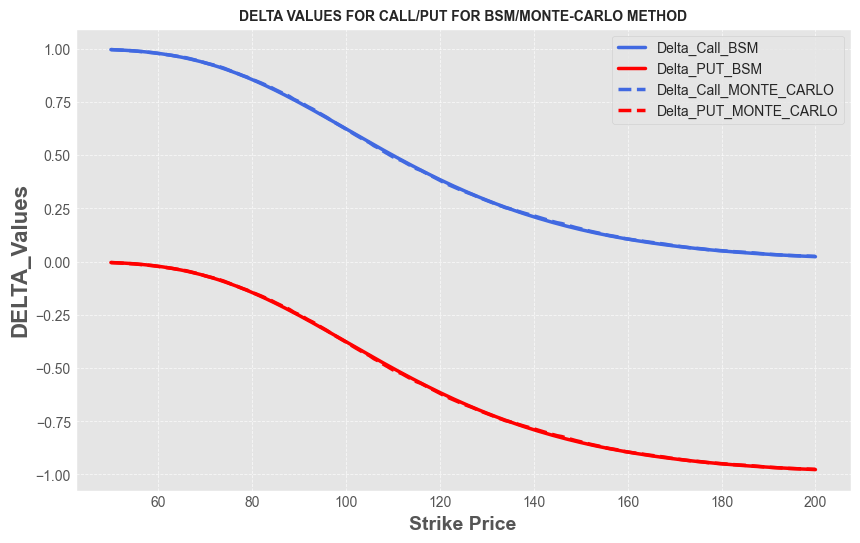

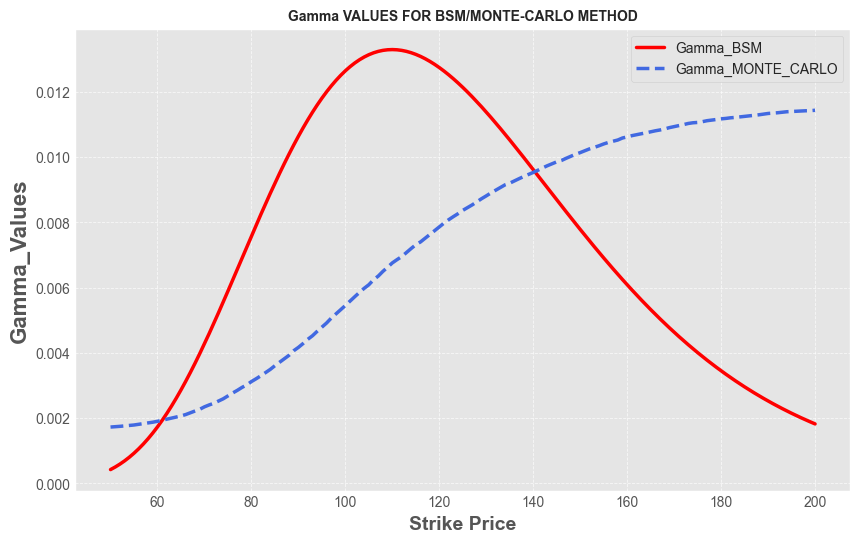

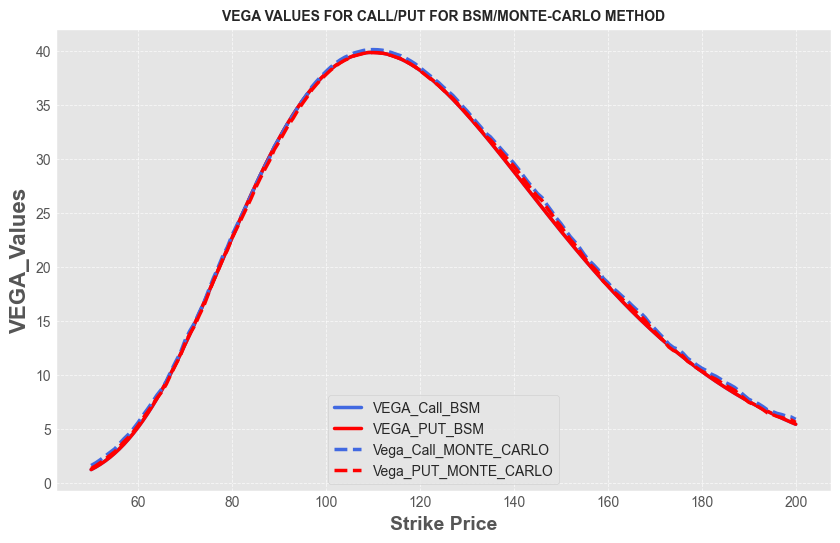

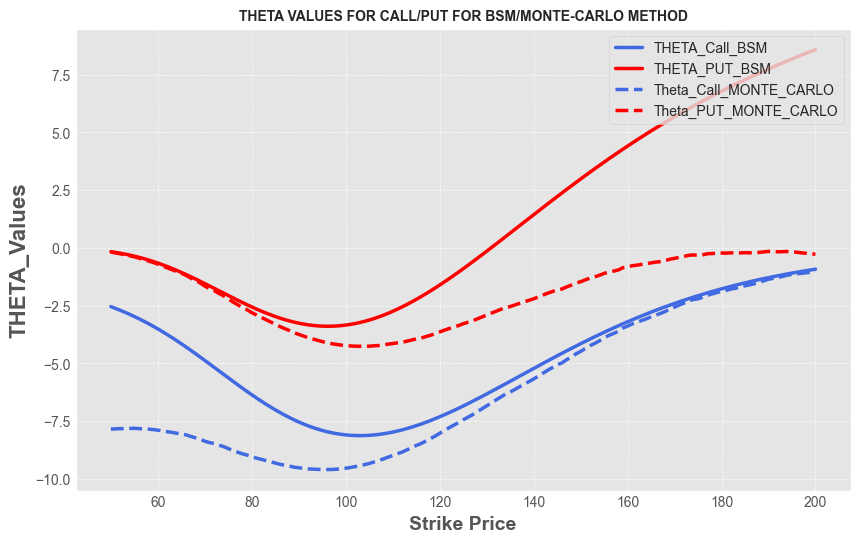

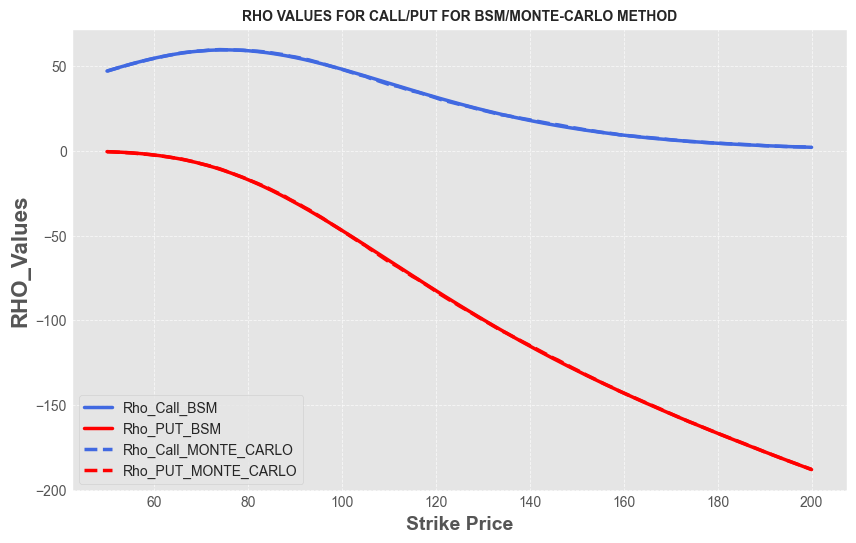

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('ggplot')
GREEKS_BSM                                         # Loading the greeks data of the bsm model
GREEKS_MONTE_CARLO                                 # loading the greeks data of the monte carlo model



                                                    # pLotting the Delta for call and puts for the Bsm and Monte carlo Generated solutions
plt.figure(figsize=(10, 6))
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['DELTA_CALL'], label='Delta_Call_BSM', color='royalblue',linestyle='-',linewidth=2.5)
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['DELTA_PUT'], label='Delta_PUT_BSM',color='red',linewidth=2.5,linestyle='-')
plt.plot(GREEKS_MONTE_CARLO['Strikes'], GREEKS_MONTE_CARLO['DELTA_CALL'], label='Delta_Call_MONTE_CARLO', color='royalblue',linestyle='--',linewidth=2.5)
plt.plot(GREEKS_MONTE_CARLO['Strikes'], GREEKS_MONTE_CARLO['DELTA_PUT'], label='Delta_PUT_MONTE_CARLO', color='red',linestyle='--',linewidth=2.5)
plt.legend(loc='upper right', frameon=True)
plt.title('DELTA VALUES FOR CALL/PUT FOR BSM/MONTE-CARLO METHOD',fontdict={'fontweight':'bold','fontsize':10})
plt.xlabel('Strike Price',fontdict={'fontweight':'bold','fontsize':14})
plt.ylabel('DELTA_Values',fontdict={'fontweight':'bold','fontsize':16})
plt.grid(True,linestyle='--',linewidth=0.6,alpha=0.7)
fig_path=os.path.join(results_dir,'DELTA_MONTE-CARLO_BSM_CALL_PUT.png')
plt.savefig(fig_path, dpi=300, bbox_inches='tight')



                                                   # pLotting the Gamma for call and puts for the Bsm and Monte carlo Generated solutions


plt.figure(figsize=(10, 6))
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['GAMMA_CALL'], label='Gamma_BSM',color='red',linewidth=2.5,linestyle='-')
plt.plot(GREEKS_MONTE_CARLO['Strikes'], GREEKS_MONTE_CARLO['GAMMA_CALL'], label='Gamma_MONTE_CARLO', color='royalblue',linestyle='--',linewidth=2.5)
plt.legend(loc='upper right', frameon=True)
plt.title('Gamma VALUES FOR BSM/MONTE-CARLO METHOD',fontdict={'fontweight':'bold','fontsize':10})
plt.xlabel('Strike Price',fontdict={'fontweight':'bold','fontsize':14})
plt.ylabel('Gamma_Values',fontdict={'fontweight':'bold','fontsize':16})
plt.grid(True,linestyle='--',linewidth=0.6,alpha=0.7)
fig_path=os.path.join(results_dir,'GAMMA_MONTE-CARLO_BSM_CALL_PUT.png')
plt.savefig(fig_path, dpi=300, bbox_inches='tight')





                                                 # pLotting the Vega for call and puts for the Bsm and Monte carlo Generated solutions
plt.figure(figsize=(10, 6))
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['VEGA_CALL'], label='VEGA_Call_BSM', color='royalblue',linestyle='-',linewidth=2.5)
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['VEGA_PUT'], label='VEGA_PUT_BSM',color='red',linewidth=2.5,linestyle='-')
plt.plot(GREEKS_MONTE_CARLO['Strikes'], GREEKS_MONTE_CARLO['VEGA_CALL'], label='Vega_Call_MONTE_CARLO', color='royalblue',linestyle='--',linewidth=2.5)
plt.plot(GREEKS_MONTE_CARLO['Strikes'], GREEKS_MONTE_CARLO['VEGA_PUT'], label='Vega_PUT_MONTE_CARLO', color='red',linestyle='--',linewidth=2.5)
plt.legend(loc='lower center', frameon=True)
plt.title('VEGA VALUES FOR CALL/PUT FOR BSM/MONTE-CARLO METHOD',fontdict={'fontweight':'bold','fontsize':10})
plt.xlabel('Strike Price',fontdict={'fontweight':'bold','fontsize':14})
plt.ylabel('VEGA_Values',fontdict={'fontweight':'bold','fontsize':16})
plt.grid(True,linestyle='--',linewidth=0.6,alpha=0.7)
fig_path=os.path.join(results_dir,'VEGA_MONTE-CARLO_BSM_CALL_PUT.png')
plt.savefig(fig_path, dpi=300, bbox_inches='tight')



 
                                                   # pLotting the Theta for call and puts for the Bsm and Monte carlo Generated solutions
plt.figure(figsize=(10, 6))
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['THETA_CALL'], label='THETA_Call_BSM', color='royalblue',linestyle='-',linewidth=2.5)
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['THETA_PUT'], label='THETA_PUT_BSM',color='red',linewidth=2.5,linestyle='-')
plt.plot(GREEKS_MONTE_CARLO['Strikes'], GREEKS_MONTE_CARLO['THETA_CALL'], label='Theta_Call_MONTE_CARLO', color='royalblue',linestyle='--',linewidth=2.5)
plt.plot(GREEKS_MONTE_CARLO['Strikes'], GREEKS_MONTE_CARLO['THETA_PUT'], label='Theta_PUT_MONTE_CARLO', color='red',linestyle='--',linewidth=2.5)
plt.legend(loc='upper right', frameon=True)
plt.title('THETA VALUES FOR CALL/PUT FOR BSM/MONTE-CARLO METHOD',fontdict={'fontweight':'bold','fontsize':10})
plt.xlabel('Strike Price',fontdict={'fontweight':'bold','fontsize':14})
plt.ylabel('THETA_Values',fontdict={'fontweight':'bold','fontsize':16})
plt.grid(True,linestyle='--',linewidth=0.6,alpha=0.7)
fig_path=os.path.join(results_dir,'THETA_MONTE-CARLO_BSM_CALL_PUT.png')
plt.savefig(fig_path, dpi=300, bbox_inches='tight')



                                                 # pLotting the Rho for call and puts for the Bsm and Monte carlo Generated solutions

plt.figure(figsize=(10, 6))
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['RHO_CALL'], label='Rho_Call_BSM', color='royalblue',linestyle='-',linewidth=2.5)
plt.plot(GREEKS_BSM['Strikes'], GREEKS_BSM['RHO_PUT'], label='Rho_PUT_BSM',color='red',linewidth=2.5,linestyle='-')
plt.plot(GREEKS_MONTE_CARLO['Strikes'], GREEKS_MONTE_CARLO['RHO_CALL'], label='Rho_Call_MONTE_CARLO', color='royalblue',linestyle='--',linewidth=2.5)
plt.plot(GREEKS_MONTE_CARLO['Strikes'], GREEKS_MONTE_CARLO['RHO_PUT'], label='Rho_PUT_MONTE_CARLO', color='red',linestyle='--',linewidth=2.5)
plt.legend(loc='lower left', frameon=True)
plt.title('RHO VALUES FOR CALL/PUT FOR BSM/MONTE-CARLO METHOD',fontdict={'fontweight':'bold','fontsize':10})
plt.xlabel('Strike Price',fontdict={'fontweight':'bold','fontsize':14})
plt.ylabel('RHO_Values',fontdict={'fontweight':'bold','fontsize':16})
plt.grid(True,linestyle='--',linewidth=0.6,alpha=0.7)
fig_path=os.path.join(results_dir,'RHO_MONTE-CARLO_BSM_CALL_PUT.png')
plt.savefig(fig_path, dpi=300, bbox_inches='tight')


